In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langsmith import Client
from dotenv import load_dotenv
from datetime import datetime, timedelta, UTC

In [8]:
load_dotenv(override = True)

True

In [ ]:
project_name = 'Thesis'
num_days = 100

In [11]:
client = Client()

In [12]:
start_time = datetime.now(UTC) - timedelta(days=num_days)

runs = list(
    client.list_runs(
        project_name=project_name,
        run_type="llm",
        start_time=start_time,
    )
)

In [ ]:
df = pd.DataFrame(
    [
        {
            "name": run.name,
            "model": run.extra["invocation_params"][
                "model"
            ],
            **run.inputs,
            **(run.outputs or {}),
            "error": run.error,
            "latency": (run.end_time - run.start_time).total_seconds()
            if run.end_time
            else None, 
            "prompt_tokens": run.prompt_tokens,
            "completion_tokens": run.completion_tokens,
            "total_tokens": run.total_tokens,
        }
        for run in runs
    ],
    index=[run.id for run in runs],
)

df.head(5)

,name,model,messages,generations,llm_output,run,type,error,latency,prompt_tokens,completion_tokens,total_tokens
d779035f-be6c-4349-8d69-d59119faa06d,ChatOpenAI,gpt-4o,"[[{'lc': 1, 'type': 'constructor', 'id': ['lan...",[[{'text': '### Assessment Results Here are t...,"{'token_usage': {'completion_tokens': 214, 'pr...",NaN,LLMResult,None,3.730141,4314,214,4528
d936fe88-32a8-4c4b-82d4-fcfa951f2fb4,ChatOpenAI,gpt-4o,"[[{'lc': 1, 'type': 'constructor', 'id': ['lan...","[[{'text': '{""action"":{""report"":""Assessment is...","{'token_usage': {'completion_tokens': 17, 'pro...",NaN,LLMResult,None,0.673062,792,17,809
d4add851-ac47-4bf2-9b16-753c939e2ebd,ChatOpenAI,gpt-4o,"[[{'lc': 1, 'type': 'constructor', 'id': ['lan...","[[{'text': '{""title"":""R-squared Interpretation...","{'token_usage': {'completion_tokens': 55, 'pro...",NaN,LLMResult,None,1.434792,767,55,822
8c45eacf-22b0-4345-acfc-f5d212062d4a,ChatOpenAI,gpt-4o,"[[{'lc': 1, 'type': 'constructor', 'id': ['lan...","[[{'text': '{""action"":{""evals"":[{""title"":""R-sq...","{'token_usage': {'completion_tokens': 47, 'pro...",NaN,LLMResult,None,0.984055,786,47,833
53cac372-b933-4010-9fcf-5b63fdb0c1cf,ChatOpenAI,gpt-4o,"[[{'lc': 1, 'type': 'constructor', 'id': ['lan...","[[{'text': '{""title"":""Positive Slope Interpret...","{'token_usage': {'completion_tokens': 46, 'pro...",NaN,LLMResult,None,1.194618,794,46,840


In [5]:
df.shape

(347, 12)

Text(0, 0.5, 'Frequency')

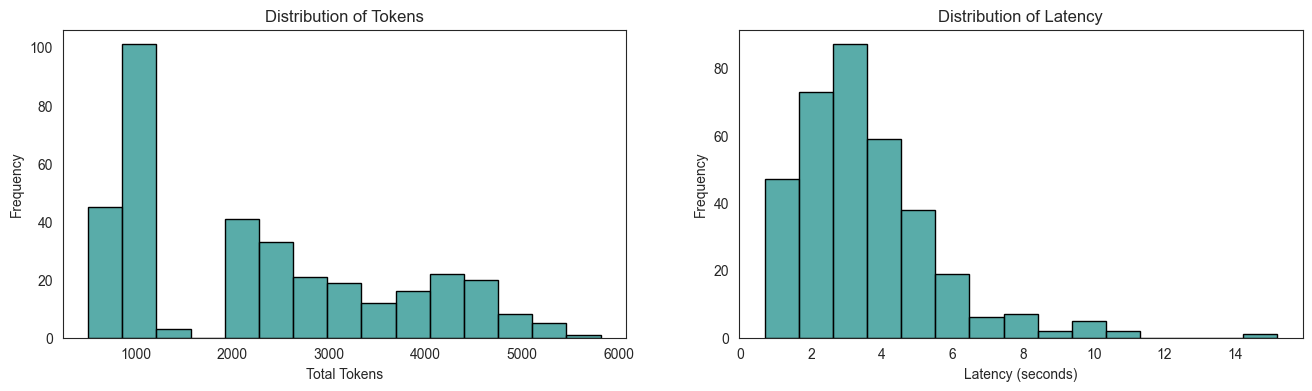

In [ ]:
sns.set_style("white")

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(
    data=df,
    x="total_tokens",
    kde=False,
    bins=15,
    color=sns.color_palette("viridis", as_cmap=True)(0.5),
    edgecolor='black',
    linewidth=1
)
plt.title("Distribution of Tokens", fontsize=12)
plt.xlabel("Total Tokens", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.subplot(1, 2, 2)
sns.histplot(
    data=df,
    x="latency",
    kde=False,
    bins=15,
    color=sns.color_palette("viridis", as_cmap=True)(0.5),
    edgecolor='black',
    linewidth=1
)
plt.title("Distribution of Latency", fontsize=12)
plt.xlabel("Latency (seconds)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

In [18]:
df.to_csv("logs.csv", index=False)